In [2]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
url1 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/juice/Yami%20Juice.csv'
url2 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/juice/Juice%20Data-weee%20ScrapeStorm.csv'
url3 = 'https://raw.githubusercontent.com/mandy941/Chinese-Product-in-US-Market/main/SNACK%20MARKET/Analysis%20Data/juice/juice-freshgogoData-ScrapeStorm.csv'
yami = pd.read_csv(url1, encoding='latin1')
yami.head()

,Product_Name,Reviews,Price,Option,Origin,Rate,Platform,Category,Sold_Weekly,Sold_Monthly,Weekly_Revenue
0,Pumpkin + Manuka Honey Juice Squeeze 7 Packets...,33,19.99,No,Australia,4.8,Yami,Juice,25,100,500
1,Multi-Functional Automatic and Self Cleaning S...,8,499.99,2 Options,Mainland China,4.9,Yami,Juice,25,100,12500
2,Full Score Micro Bubble Juice Wanglin Green Ap...,8,1.80,2 Options,Mainland China,4.8,Yami,Juice,200,800,360
3,VITA Lychee Juice 250ml,102,0.79,7 Options,Hong Kong,4.7,Yami,Juice,25,100,20
4,Sparkling Yuzu Juice 250ml,40,3.49,4 Options,Japan,4.5,Yami,Juice,25,100,87


In [4]:
weee = pd.read_csv(url2, encoding='latin1')
weee.head()

,Product_Name,Price,Sold_Weekly,Origin,Brand,Rate,Reviews,Sold_Monthly,Weekly_revenue,Platform,Category
0,Fremo Aloe Juice Original 1.5L 1 bottle,3.79,50,South Korea,Unclear,Unclear,1,200,190,Weee,Juice
1,Huiyuan Peach Juice 200 ml,1.59,100,Mainland China,Unclear,Unclear,0,400,159,Weee,Juice
2,FREMO Aloe Juice Peach Flavor 1.5L 1 bottle,3.79,100,South Korea,Unclear,Unclear,0,400,379,Weee,Juice
3,Huiyuan Grape Juice 200 ml,1.59,50,Mainland China,Unclear,Unclear,0,200,80,Weee,Juice
4,Chin Chin Peach Juice Drink 10.8 oz,1.49,50,Taiwan,CHINCHIN,Unclear,5,200,75,Weee,Juice


In [5]:
freshgogo = pd.read_csv(url3)
freshgogo.head()

,Product_Name,Price,Sold_Monthly,Reviews,Origin,Sold_Weekly,Weekly_revenue,Rate,Brand,Platform,Category
0,ARTIC OCEAN Orange Soda,11.49,1962,0,Unclear,491,5636,Unclear,Unclear,Freshgogo,Juice
1,YESHU Coconut Juice,8.99,1716,15,Unclear,429,3857,Unclear,Unclear,Freshgogo,Juice
2,LAY'S Potato Chip (tomato),2.99,8078,0,Mainland China,2020,6038,Unclear,Unclear,Freshgogo,Juice
3,ARTIC OCEAN Orange Soda (glass),2.29,1312,3,Unclear,328,751,Unclear,Unclear,Freshgogo,Juice
4,XIN YUAN ZHAI Osmanthus Plum Juice,2.29,1672,1,Unclear,418,957,Unclear,Unclear,Freshgogo,Juice


# Combine three tables together

In [6]:
df = pd.concat([yami,weee,freshgogo])
df.head()

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Weekly_revenue
0,NaN,Juice,No,Australia,Yami,19.99,Pumpkin + Manuka Honey Juice Squeeze 7 Packets...,4.8,33,100,25,500.0,NaN
1,NaN,Juice,2 Options,Mainland China,Yami,499.99,Multi-Functional Automatic and Self Cleaning S...,4.9,8,100,25,12500.0,NaN
2,NaN,Juice,2 Options,Mainland China,Yami,1.80,Full Score Micro Bubble Juice Wanglin Green Ap...,4.8,8,800,200,360.0,NaN
3,NaN,Juice,7 Options,Hong Kong,Yami,0.79,VITA Lychee Juice 250ml,4.7,102,100,25,20.0,NaN
4,NaN,Juice,4 Options,Japan,Yami,3.49,Sparkling Yuzu Juice 250ml,4.5,40,100,25,87.0,NaN


In [7]:
print(df.shape)
print(list(df.columns))

(1195, 13)
['Brand', 'Category', 'Option', 'Origin', 'Platform', 'Price', 'Product_Name', 'Rate', 'Reviews', 'Sold_Monthly', 'Sold_Weekly', 'Weekly_Revenue', 'Weekly_revenue']


# Analysis

In [8]:
df.describe()

,Price,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Weekly_revenue
count,1195.000000,1195.000000,1195.000000,1195.000000,1072.000000,123.000000
mean,6.177130,23.770711,680.761506,170.194142,674.758396,1416.056911
std,19.638169,75.577160,869.885030,217.485041,1257.174436,2881.544828
min,0.690000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.690000,1.000000,100.000000,25.000000,99.750000,0.000000
50%,2.390000,4.000000,800.000000,200.000000,398.000000,180.000000
75%,3.690000,13.000000,800.000000,200.000000,598.000000,957.500000
max,499.990000,1072.000000,13736.000000,3434.000000,12500.000000,14398.000000


In [9]:
df.sum(axis = 0)

Price               7381.67
Reviews            28406.00
Sold_Monthly      813510.00
Sold_Weekly       203382.00
Weekly_Revenue    723341.00
Weekly_revenue    174175.00
dtype: float64

In [10]:
df['Origin'] = df['Origin'].replace('ROYAL FAMILY','Unclear')

# The Most Popular Origin (Highest Weekly Revenue /Num of Product)


In [11]:
origin = df.groupby(['Origin'])['Product_Name'].count()
origin

Origin
Australia           9
Brazil              1
Hong Kong          24
Indonesia           5
Japan             390
Korea              88
Mainland China    366
Malaysia            3
Philippines         5
Singapore          12
South Korea        11
Taiwan            112
Thailand           30
Unclear            60
United States      72
Vietnam             7
Name: Product_Name, dtype: int64

In [12]:
pop_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()/df.groupby(['Origin'])['Product_Name'].count()
pop_origin

Origin
Australia         1747.222222
Brazil              50.000000
Hong Kong          148.625000
Indonesia          144.400000
Japan              600.415385
Korea              650.613636
Mainland China     558.248634
Malaysia          2795.000000
Philippines          0.000000
Singapore          211.083333
South Korea          0.000000
Taiwan             948.821429
Thailand           376.400000
Unclear            351.950000
United States      777.236111
Vietnam            283.714286
dtype: float64

In [13]:
pop_origin.sort_values(ascending=False).head(10)

Origin
Malaysia          2795.000000
Australia         1747.222222
Taiwan             948.821429
United States      777.236111
Korea              650.613636
Japan              600.415385
Mainland China     558.248634
Thailand           376.400000
Unclear            351.950000
Vietnam            283.714286
dtype: float64

# The most popular brand by unit selling


In [14]:
pop_brand = df.groupby(['Brand'])['Weekly_Revenue'].sum()/df.groupby(['Brand'])['Product_Name'].count()
pop_brand

Brand
CHINCHIN                0.0
Coco King               0.0
Datu Puti               0.0
Dragon Fly              0.0
Genki Forest            0.0
Haowangshui             0.0
Jack & King's           0.0
Kimino                  0.0
Lotte                   0.0
Paldo                   0.0
Singing Bird Brand      0.0
Uncle Matts Organics    0.0
Unclear                 0.0
Weichuan                0.0
Yamajirushi             0.0
dtype: float64

In [15]:
pop_brand.sort_values(ascending=False).head(5)

Brand
Yamajirushi             0.0
Weichuan                0.0
Unclear                 0.0
Uncle Matts Organics    0.0
Singing Bird Brand      0.0
dtype: float64

# The popular brand by revenue

In [16]:
pop_brand2 = df.groupby(['Brand'])['Weekly_Revenue'].sum()
pop_brand2

Brand
CHINCHIN                0.0
Coco King               0.0
Datu Puti               0.0
Dragon Fly              0.0
Genki Forest            0.0
Haowangshui             0.0
Jack & King's           0.0
Kimino                  0.0
Lotte                   0.0
Paldo                   0.0
Singing Bird Brand      0.0
Uncle Matts Organics    0.0
Unclear                 0.0
Weichuan                0.0
Yamajirushi             0.0
Name: Weekly_Revenue, dtype: float64

In [17]:
pop_brand2.sort_values(ascending=False).head(5)

Brand
Yamajirushi             0.0
Weichuan                0.0
Unclear                 0.0
Uncle Matts Organics    0.0
Singing Bird Brand      0.0
Name: Weekly_Revenue, dtype: float64

# The Main Import Origin

In [18]:
main_origin = df.groupby(['Origin'])['Product_Name'].count()
main_origin

Origin
Australia           9
Brazil              1
Hong Kong          24
Indonesia           5
Japan             390
Korea              88
Mainland China    366
Malaysia            3
Philippines         5
Singapore          12
South Korea        11
Taiwan            112
Thailand           30
Unclear            60
United States      72
Vietnam             7
Name: Product_Name, dtype: int64

In [19]:
main_origin.sort_values(ascending=False).head(5)

Origin
Japan             390
Mainland China    366
Taiwan            112
Korea              88
United States      72
Name: Product_Name, dtype: int64

# The most value import Origin

In [20]:
value_origin = df.groupby(['Origin'])['Weekly_Revenue'].sum()
value_origin

Origin
Australia          15725.0
Brazil                50.0
Hong Kong           3567.0
Indonesia            722.0
Japan             234162.0
Korea              57254.0
Mainland China    204319.0
Malaysia            8385.0
Philippines            0.0
Singapore           2533.0
South Korea            0.0
Taiwan            106268.0
Thailand           11292.0
Unclear            21117.0
United States      55961.0
Vietnam             1986.0
Name: Weekly_Revenue, dtype: float64

In [21]:
value_origin.sort_values(ascending=False).head(5)

Origin
Japan             234162.0
Mainland China    204319.0
Taiwan            106268.0
Korea              57254.0
United States      55961.0
Name: Weekly_Revenue, dtype: float64

# platform offers choice - most


In [22]:
choice = df.groupby(['Platform'])['Product_Name'].count()
choice

Platform
Freshgogo      21
Weee          102
Yami         1072
Name: Product_Name, dtype: int64

In [23]:
value_choice =  df.groupby(['Platform'])['Weekly_Revenue'].sum()/df.groupby(['Platform'])['Product_Name'].count()
value_choice

Platform
Freshgogo      0.000000
Weee           0.000000
Yami         674.758396
dtype: float64

## The Number of profuct by origin

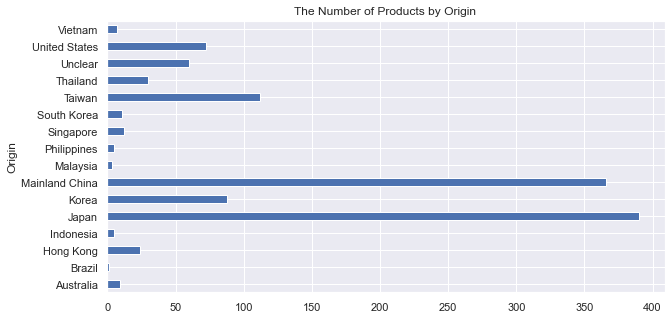

In [24]:
count_origin = df.groupby([df['Origin']])['Product_Name'].count()
count_origin.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Origin ")

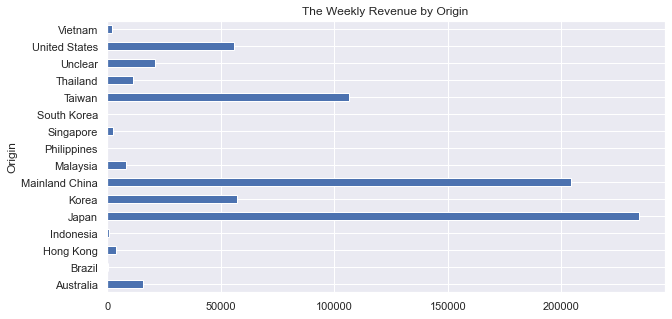

In [25]:
sum_revenue = df.groupby([df['Origin']])['Weekly_Revenue'].sum()
sum_revenue.plot(kind='barh',figsize=(10,5),legend=None, title="The Weekly Revenue by Origin ")

In [26]:
count_platform = df.groupby(['Platform'])['Product_Name'].count()
count_platform

Platform
Freshgogo      21
Weee          102
Yami         1072
Name: Product_Name, dtype: int64

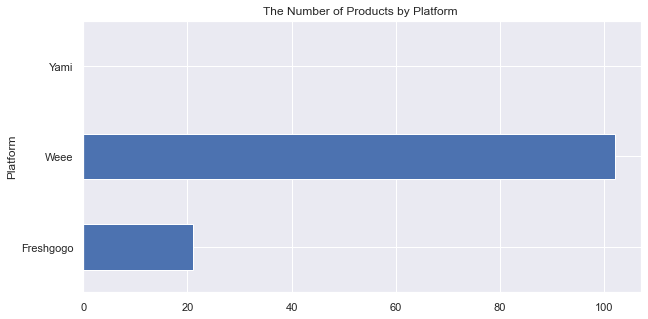

In [27]:
platform = df.groupby([df['Platform']])['Brand'].count()
platform.plot(kind='barh',figsize=(10,5),legend=None, title="The Number of Products by Platform ")

Text(0.5, 1.0, 'Figure 5: Correlations')

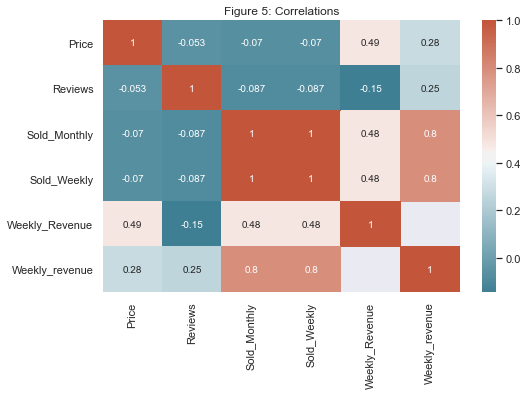

In [28]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(8,5))

corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 5: Correlations')

## Origin vs Platform


Text(0.5, 1.0, 'Platform vs. Origin')

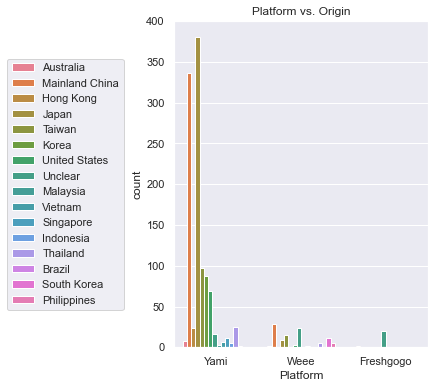

In [29]:
# Origin vs Platform

plt.rcParams['figure.figsize'] = (10, 6)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Platform',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Platform vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


Platform,Freshgogo,Weee,Yami
Origin,,,
Australia,0,1,8
Brazil,0,0,1
Hong Kong,0,0,24
Indonesia,0,0,5
Japan,0,9,381
Korea,0,0,88
Mainland China,1,28,337
Malaysia,0,0,3
Philippines,0,5,0


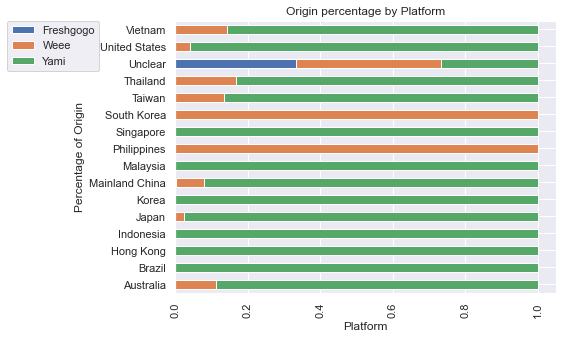

In [43]:
# check the Origin percentage of Platform
plt.rcParams['figure.figsize'] = (15, 5)
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Origin, df.Platform)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Platform')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Platform')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Origin')

c2_c

## Origin Vs Sold_Weekly_Group

In [31]:
df['Sold_Weekly_Group'] = pd.cut(x = df['Sold_Weekly'], 
                                   bins = [0,50,100,200,300,400,500,1000,2000,10000],
                                   labels = ['Less than 50','50+','100+','200+','300+','400+','500+','1000+','2000+'])
df.head()

,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Weekly_revenue,Sold_Weekly_Group
0,NaN,Juice,No,Australia,Yami,19.99,Pumpkin + Manuka Honey Juice Squeeze 7 Packets...,4.8,33,100,25,500.0,NaN,Less than 50
1,NaN,Juice,2 Options,Mainland China,Yami,499.99,Multi-Functional Automatic and Self Cleaning S...,4.9,8,100,25,12500.0,NaN,Less than 50
2,NaN,Juice,2 Options,Mainland China,Yami,1.80,Full Score Micro Bubble Juice Wanglin Green Ap...,4.8,8,800,200,360.0,NaN,100+
3,NaN,Juice,7 Options,Hong Kong,Yami,0.79,VITA Lychee Juice 250ml,4.7,102,100,25,20.0,NaN,Less than 50
4,NaN,Juice,4 Options,Japan,Yami,3.49,Sparkling Yuzu Juice 250ml,4.5,40,100,25,87.0,NaN,Less than 50


Text(0.5, 1.0, 'Sold_Weekly_Group vs. Origin')

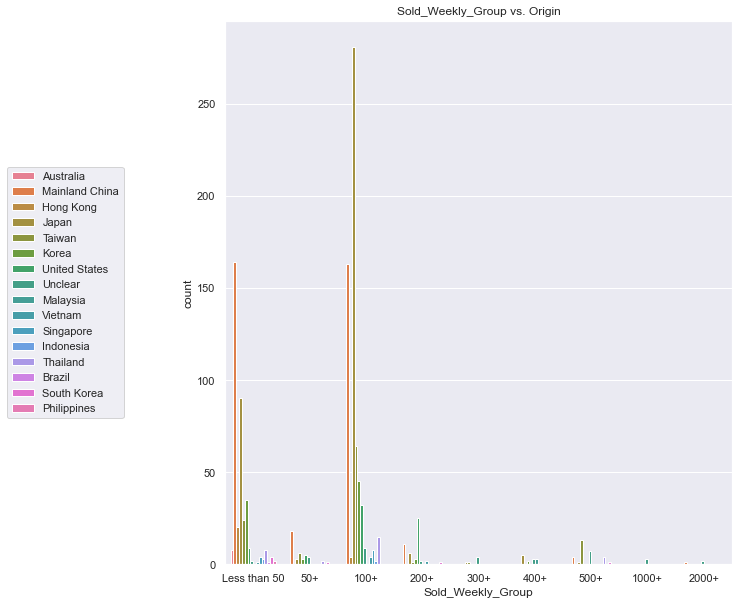

In [32]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 10)

# compare the year with Origin with Platform
plt.subplot(121)
sns.countplot(x='Sold_Weekly_Group',hue= 'Origin', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Sold_Weekly_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Origin,Australia,Brazil,Hong Kong,Indonesia,Japan,Korea,Mainland China,Malaysia,Philippines,Singapore,South Korea,Taiwan,Thailand,Unclear,United States,Vietnam
Sold_Weekly_Group,,,,,,,,,,,,,,,,
Less than 50,8,1,20,3,90,35,164,0,2,4,4,24,8,2,9,1
50+,0,0,0,0,3,3,18,0,0,0,1,6,2,4,5,0
100+,0,0,4,2,281,45,163,0,0,8,0,64,15,9,32,4
200+,0,0,0,0,6,3,11,0,0,0,1,1,0,2,25,2
300+,0,0,0,0,1,0,0,0,0,0,0,1,0,4,0,0
400+,0,0,0,0,5,2,0,3,0,0,0,0,0,3,0,0
500+,0,0,0,0,1,0,4,0,0,0,1,13,4,7,0,0
1000+,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
2000+,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0


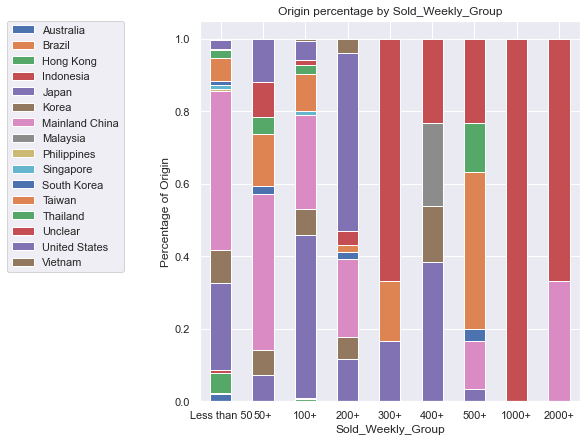

In [33]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 7)
# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab( df.Sold_Weekly_Group, df.Origin)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Origin percentage by Sold_Weekly_Group')
plt.legend(bbox_to_anchor=(-0.2, 1), loc='left', borderaxespad=0)
plt.xlabel('Sold_Weekly_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Origin

In [34]:
df['Price_Group'] = pd.cut(x = df['Price'], 
                                   bins = [0,2,4,6,8,10,12,14,16,10000],
                                   labels = ['Less than 2','2+','4+','6+','8+','10+','12+','14+','16+'])
df.head()

,Brand,Category,Option,Origin,Platform,Price,Product_Name,Rate,Reviews,Sold_Monthly,Sold_Weekly,Weekly_Revenue,Weekly_revenue,Sold_Weekly_Group,Price_Group
0,NaN,Juice,No,Australia,Yami,19.99,Pumpkin + Manuka Honey Juice Squeeze 7 Packets...,4.8,33,100,25,500.0,NaN,Less than 50,16+
1,NaN,Juice,2 Options,Mainland China,Yami,499.99,Multi-Functional Automatic and Self Cleaning S...,4.9,8,100,25,12500.0,NaN,Less than 50,16+
2,NaN,Juice,2 Options,Mainland China,Yami,1.80,Full Score Micro Bubble Juice Wanglin Green Ap...,4.8,8,800,200,360.0,NaN,100+,Less than 2
3,NaN,Juice,7 Options,Hong Kong,Yami,0.79,VITA Lychee Juice 250ml,4.7,102,100,25,20.0,NaN,Less than 50,Less than 2
4,NaN,Juice,4 Options,Japan,Yami,3.49,Sparkling Yuzu Juice 250ml,4.5,40,100,25,87.0,NaN,Less than 50,2+


Text(0.5, 1.0, 'Price_Group vs. Origin')

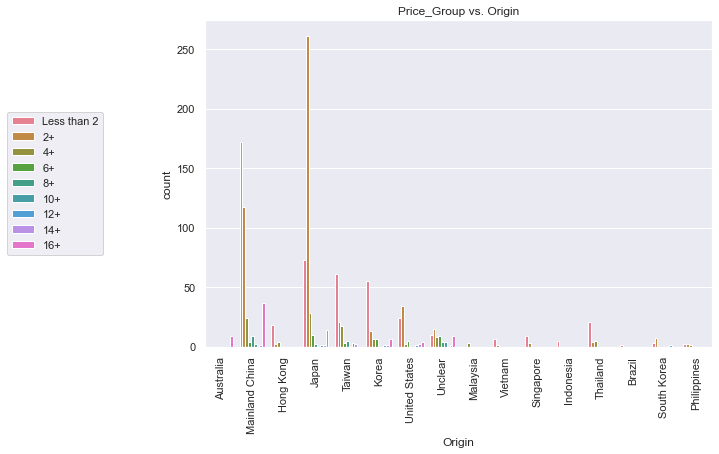

In [35]:
# origin vs Price group

plt.rcParams['figure.figsize'] = (20, 6)

# compare the year with Origin with price group
plt.subplot(121)
sns.countplot(x='Origin',hue= 'Price_Group', data=df, palette = 'husl')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Origin')

C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


Price_Group,Less than 2,2+,4+,6+,8+,10+,12+,14+,16+
Origin,,,,,,,,,
Australia,0,0,0,0,0,0,0,0,9
Brazil,1,0,0,0,0,0,0,0,0
Hong Kong,18,2,4,0,0,0,0,0,0
Indonesia,5,0,0,0,0,0,0,0,0
Japan,73,261,28,10,2,0,1,1,14
Korea,55,13,6,6,0,0,1,1,6
Mainland China,172,117,24,4,9,2,0,1,37
Malaysia,0,0,3,0,0,0,0,0,0
Philippines,2,2,1,0,0,0,0,0,0


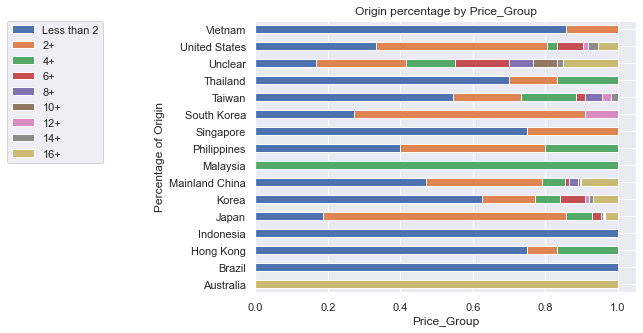

In [36]:
# origin vs sold weekly group

plt.rcParams['figure.figsize'] = (15, 5)

# check the Origin percentage of Platform
ax= plt.subplot(122)
c2_c = pd.crosstab( df.Origin, df.Price_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, ax=ax)
plt.title('Origin percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.4, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Origin')

c2_c

## Price_Group Vs Sold_Weekly_Group


C:\Users\13750\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Sold_Weekly_Group,Less than 50,50+,100+,200+,300+,400+,500+,1000+,2000+
Price_Group,,,,,,,,,
Less than 2,182,11,239,18,1,0,5,0,0
2+,108,12,321,11,3,1,5,1,3
4+,18,7,42,1,0,9,15,1,0
6+,9,2,12,0,0,1,2,0,0
8+,5,1,7,0,0,1,1,1,0
10+,1,1,2,0,0,1,1,0,0
12+,0,3,1,1,0,0,0,0,0
14+,3,3,1,0,0,0,1,0,0
16+,49,2,2,20,2,0,0,0,0


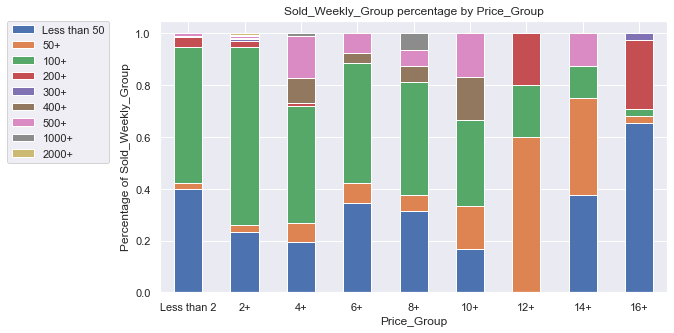

In [37]:
plt.rcParams['figure.figsize'] = (20, 5)

# check the Price_Group percentage of Sold_Weekly_Group
ax= plt.subplot(122)
c2_c = pd.crosstab(df.Price_Group, df.Sold_Weekly_Group)
c2_c.div(c2_c .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Sold_Weekly_Group percentage by Price_Group')
plt.legend(bbox_to_anchor=(-0.1, 1), loc='left', borderaxespad=0)
plt.xlabel('Price_Group')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Sold_Weekly_Group')

c2_c

Text(0.5, 1.0, 'Price_Group vs. Sold_Weekly_Group')

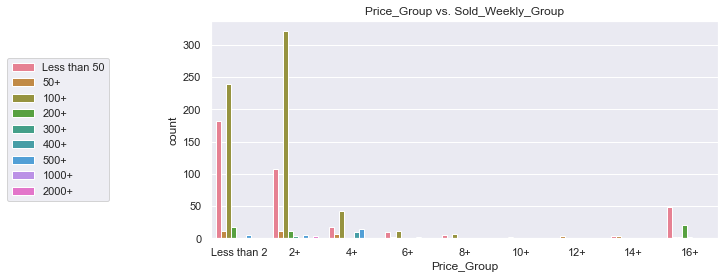

In [38]:
# price group vs sold weekly group

plt.rcParams['figure.figsize'] = (20, 4)

# compare the year with price group with sold weekly group
plt.subplot(121)
sns.countplot(x='Price_Group',hue= 'Sold_Weekly_Group', data=df, palette = 'husl')
plt.legend(bbox_to_anchor=(-0.2, 0.5), loc='right', borderaxespad=0)
plt.title('Price_Group vs. Sold_Weekly_Group')

In [40]:
df.to_csv(r'C:\Users\13750\Desktop\Empire Bazaar Group Corp\US chinese product market\SNACK MARKET\Analysis Data\juice\juice.csv', index = False)